In [397]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Set the font to SimHei (bold) for Chinese support
plt.rcParams['font.sans-serif'] = ['SimHei']  # Use bold to display Chinese
plt.rcParams['axes.unicode_minus'] = False    # Resolving Negative Signs
latex = FontProperties(
            family='Times New Roman',
            style='normal',
            size=12) #setting latex fonts

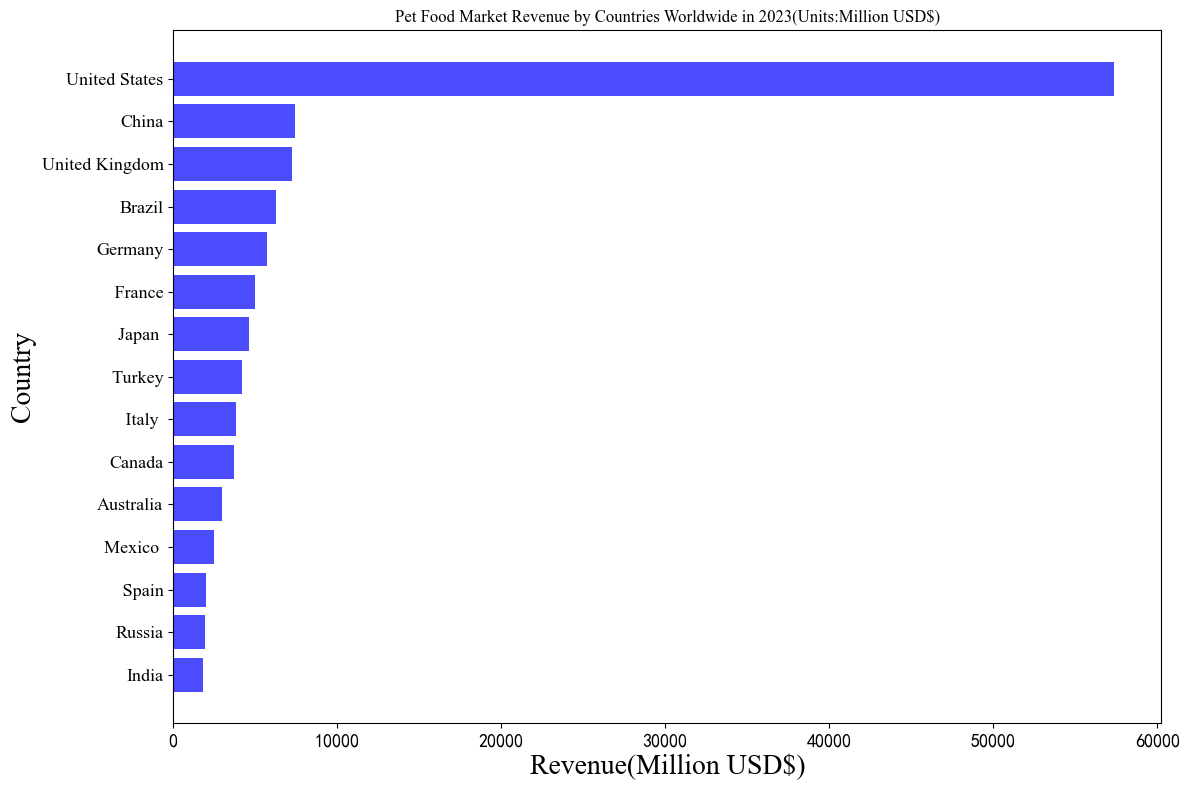

In [398]:
data = pd.read_excel('2023年世界各国宠物食品市场收入.xlsx')
# data
countries = data['国家'].values
revenues = data['收入 (百万美元)'].values

# save data in DataFrame
data = pd.DataFrame({"国家": countries, "收入 (百万美元)": revenues})

# make plot
plt.figure(figsize=(12, 8))
plt.barh(data["国家"], data["收入 (百万美元)"], color="blue", alpha=0.7)

# add title and tag
plt.title("Pet Food Market Revenue by Countries Worldwide in 2023(Units:Million USD$)", fontsize=14,fontproperties=latex)
plt.xlabel("Revenue(Million USD$)", fontsize=20,fontproperties=latex)
plt.ylabel("Country", fontsize=20,fontproperties=latex)
plt.yticks(fontproperties=latex)
plt.gca().invert_yaxis()  
plt.tick_params(labelsize=13)

# show graph
plt.tight_layout()
plt.savefig('2023年世界各国宠物食品市场收入 (单位：百万美元).png',dpi=500)
plt.show()

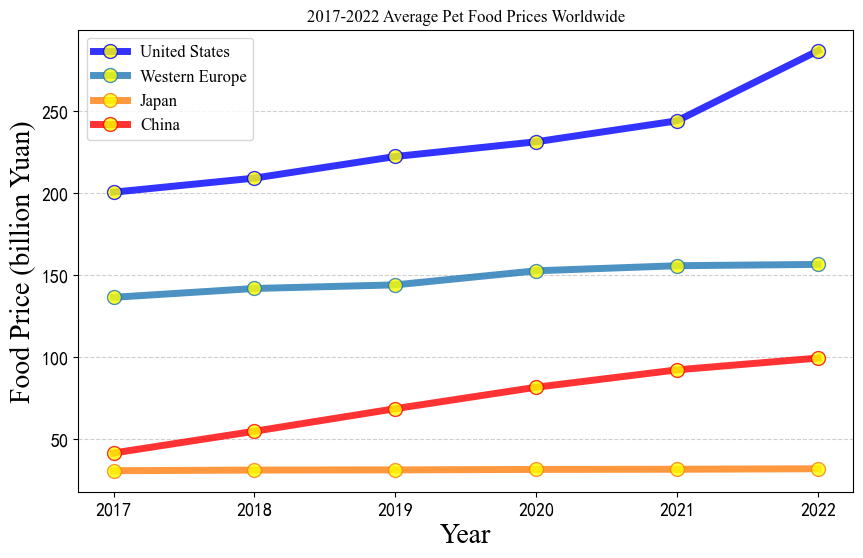

In [399]:
df = pd.read_excel('2017-2022 各国市场规模和食品规模.xlsx')
plt.figure(figsize=(10, 6))

plt.plot(df['年份'], df.美国食品, label='United States',marker="o", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,markersize=10,color='blue')
plt.plot(df['年份'], df.西欧食品, label='Western Europe',marker="o", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,markersize=10,)
plt.plot(df['年份'], df.日本食品, label='Japan',marker="o", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,markersize=10)
plt.plot(df['年份'], df.中国食品, label='China',marker="o", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,markersize=10,color='r')

plt.xticks(rotation=0)

plt.title("2017-2022 Average Pet Food Prices Worldwide", fontsize=14,fontproperties=latex)
plt.xlabel("Year", fontsize=20,fontproperties=latex)
plt.ylabel("Food Price (billion Yuan)", fontsize=20,fontproperties=latex)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(df['年份'])
plt.tick_params(labelsize=13)
plt.legend(fontsize=15,prop=latex)
plt.savefig('问题2\\2017 - 2022年各地区宠物食品平均价格.png',dpi=500)
plt.show()

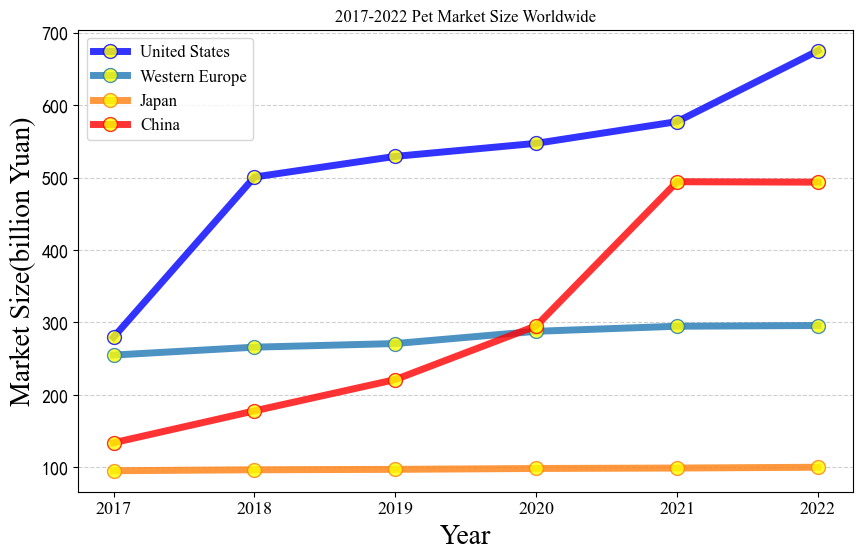

In [400]:
df = pd.read_excel('2017-2022 各国市场规模和食品规模.xlsx')
plt.figure(figsize=(10, 6))

plt.plot(df['年份'], df.美国市场, label='United States',marker="o", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,markersize=10,color='blue')
plt.plot(df['年份'], df.西欧市场, label='Western Europe',marker="o", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,markersize=10)
plt.plot(df['年份'], df.日本市场, label='Japan',marker="o", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,markersize=10)
plt.plot(df['年份'], df.中国市场, label='China',marker="o", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,markersize=10,color='r')

plt.xticks(rotation=0,fontproperties=latex)

plt.title("2017-2022 Pet Market Size Worldwide", fontsize=14,fontproperties=latex)
plt.xlabel("Year", fontsize=20,fontproperties=latex)
plt.ylabel("Market Size(billion Yuan)", fontsize=20,fontproperties=latex)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(df['年份'],fontproperties=latex)
plt.tick_params(labelsize=13)
plt.legend(fontsize=15,prop=latex)
plt.savefig('问题2\\2017 - 2022年各地区宠物市场规模 (单位：美元).png',dpi=500)
plt.show()

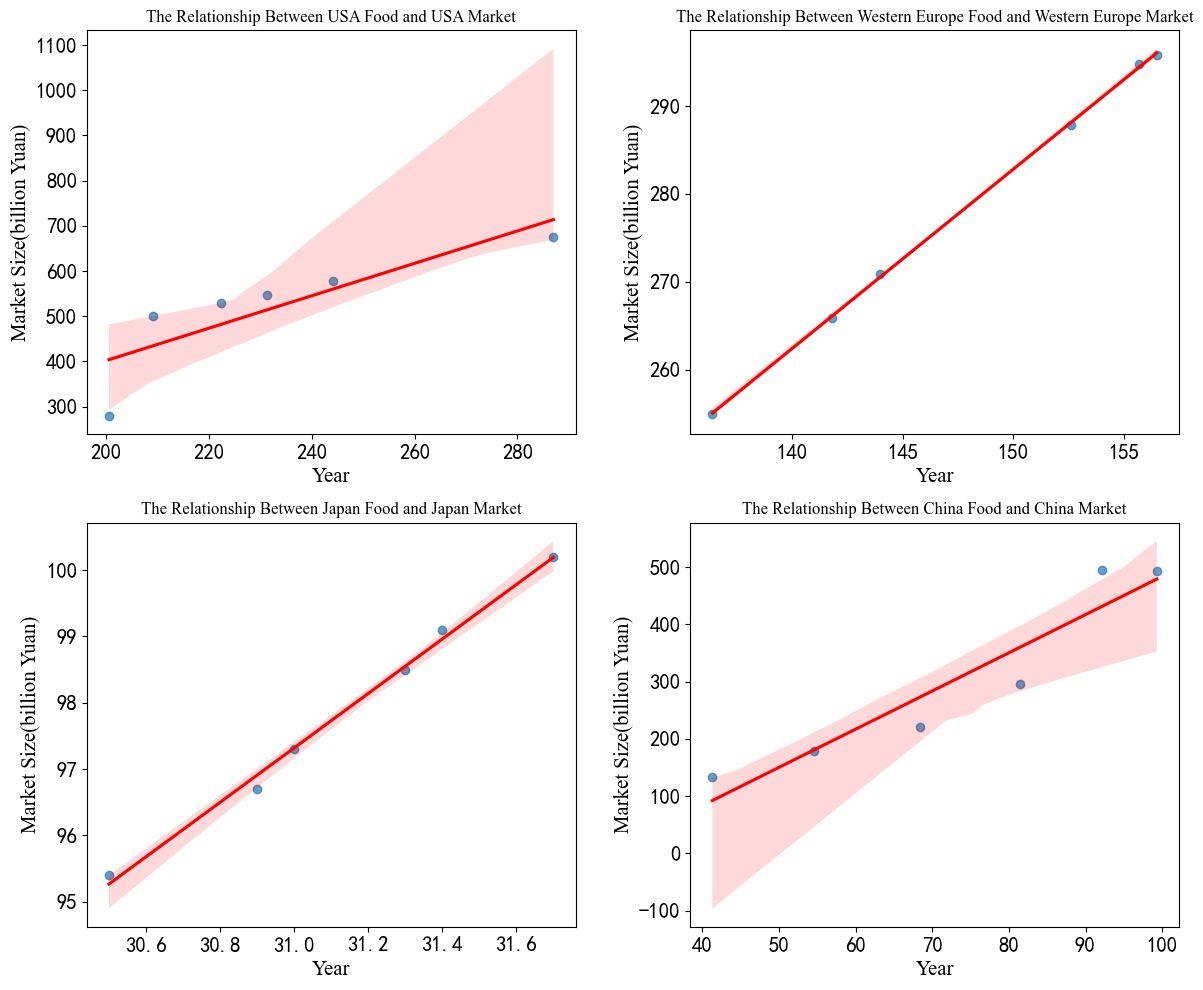

In [401]:
df2 = pd.read_excel('2017-2022 各国市场规模和食品规模2.xlsx')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

a1 = ['USA Food', 'Western Europe Food', 'Japan Food', 'China Food']
a2 = ['USA Market', 'Western Europe Market', 'Japan Market', 'China Market']

for i, ax in enumerate(axes.flat):

    sns.regplot(x=a1[i], y=a2[i], data=df2, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'}, ax=ax)
    ax.set_title(f"The Relationship Between {a1[i]} and {a2[i]}",fontproperties=latex)
    ax.set_xlabel("Year",fontsize=15,fontproperties=latex)
    ax.set_ylabel("Market Size(billion Yuan)",fontsize=15,fontproperties=latex)
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig('各国的食品与市场规模之间的关系.png',dpi=500)
plt.show()


#### Similarly, the Holt linear trend method based on Problem 1 is used to predict global food demand for all countries of the world

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

def f(years,industry_scale,name):
    # 转换为pandas DataFrame
    data = pd.DataFrame({
        'year': years,
        'industry_scale': industry_scale
    })
    data.set_index('year', inplace=True)


# Fitting the Holt linear trend model
# Holt method is applied to data with a trend, select the model that adds the trend ('add')
    model = Holt(data['industry_scale']).fit(smoothing_level=0.8, smoothing_trend=0.2)

# Projections for the next 3 years are made
    forecast_steps = 4
    forecast = model.forecast(steps=forecast_steps)

# Output prediction results
    forecast_years = ['2023','2024', '2025', '2026']
    forecast_df = pd.DataFrame({
        'year': forecast_years,
        'predicted_industry_scale': forecast
    })
   # Visualization of predicted results
    plt.figure(figsize=(10, 6))
    plt.plot(data['industry_scale'], marker="o", label="History", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,color='r')
    plt.plot(forecast_df['year'], forecast_df['predicted_industry_scale'], marker="o", label="Predict", linestyle='-',color='blue',markerfacecolor='yellow',alpha=0.8,linewidth=5)
    plt.title(f"{name}")
    plt.xlabel("Year",fontproperties=latex)
    plt.ylabel("Billion (Yuan)",fontproperties=latex)
    plt.legend(prop=latex)
    plt.grid(True)
    plt.savefig(f'问题2\\{name}.png',dpi=500)
    plt.show()
    return forecast_df['predicted_industry_scale'].values

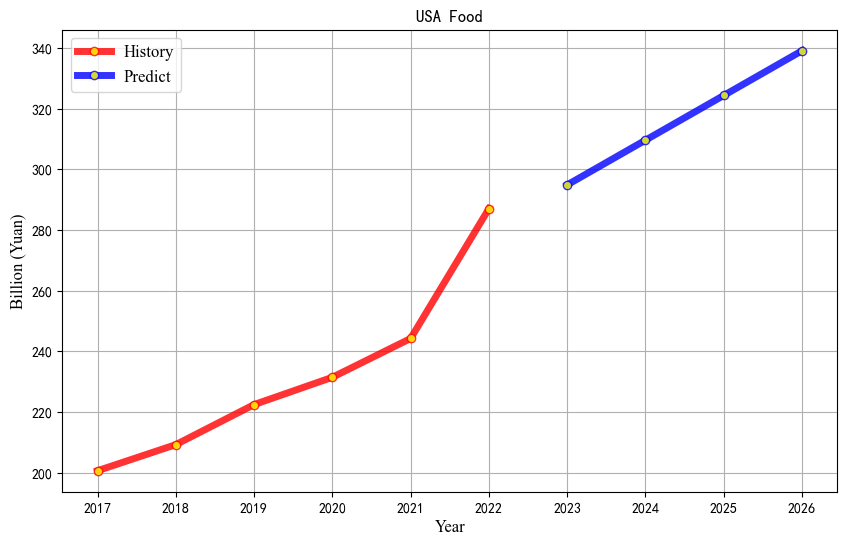

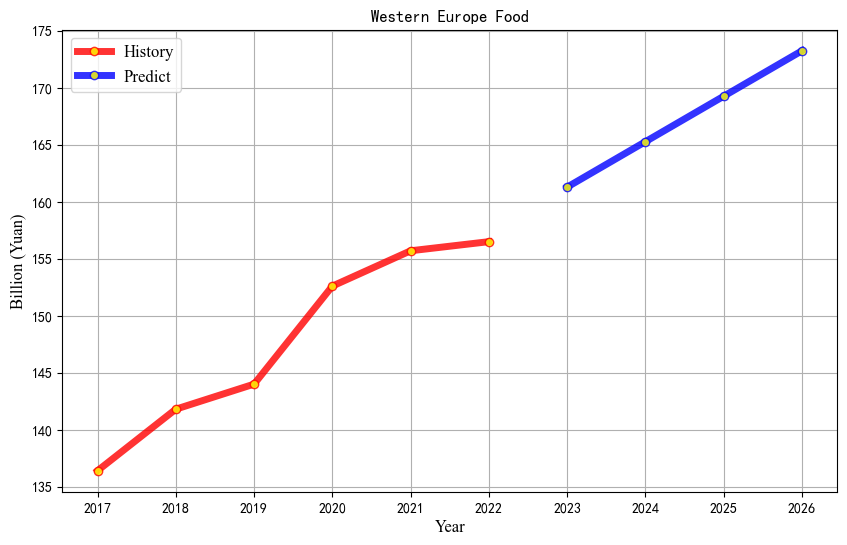

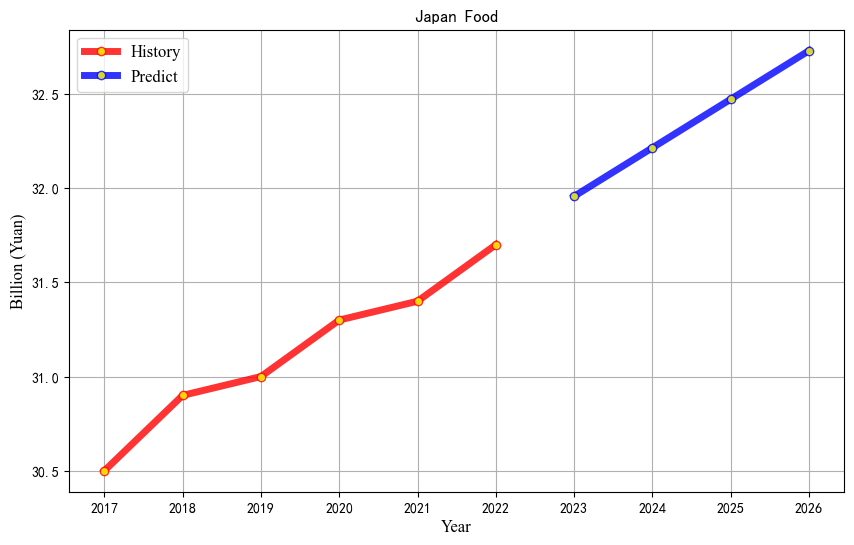

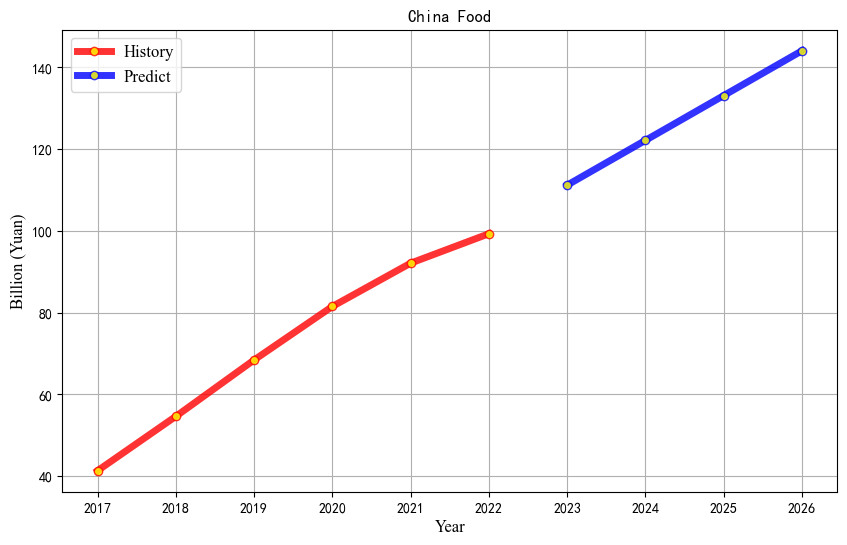

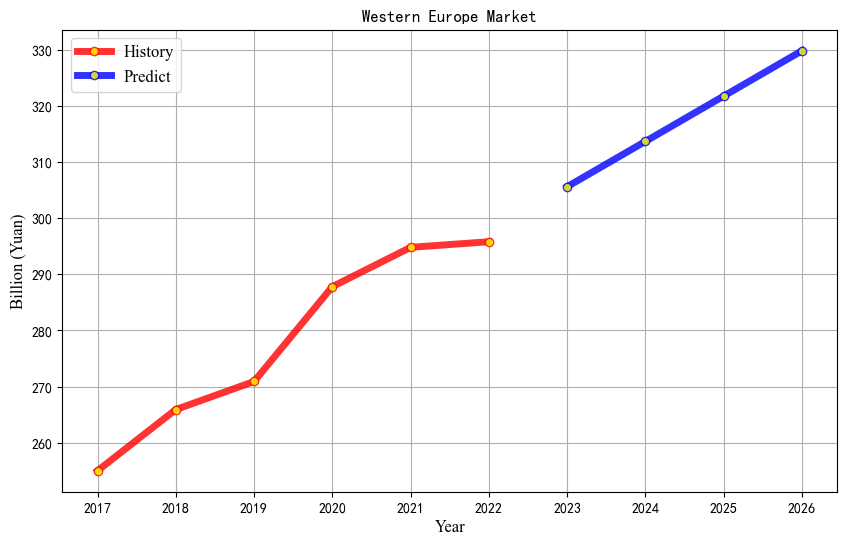

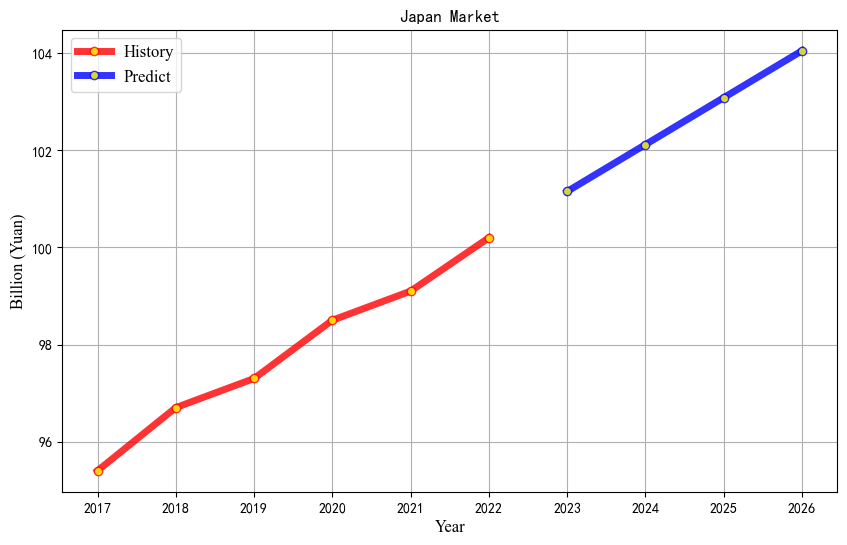

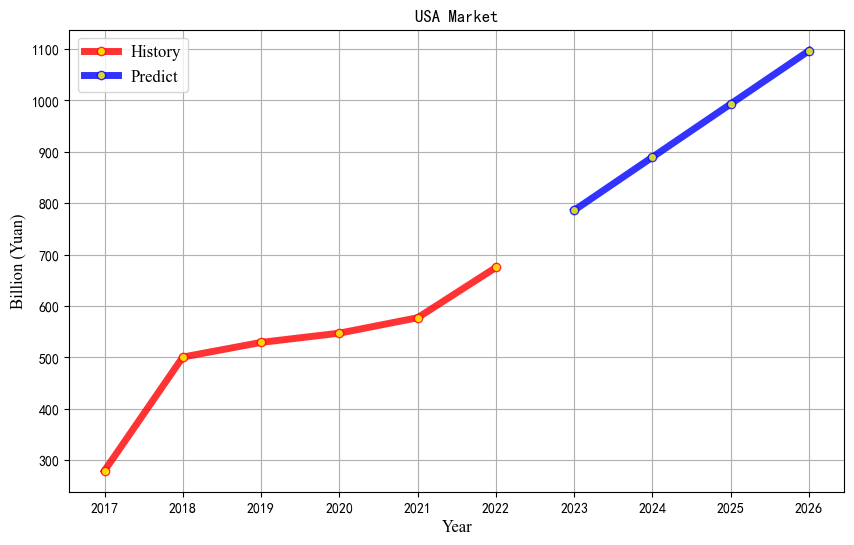

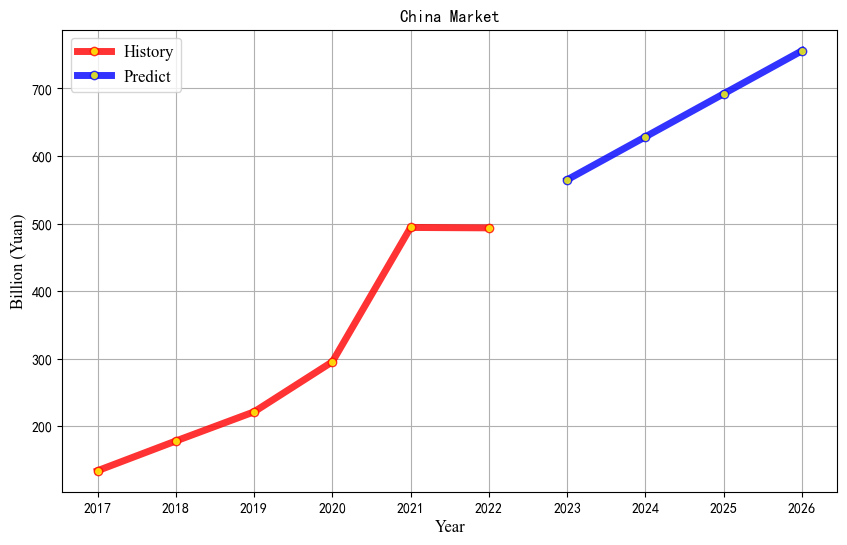

In [404]:
ls = []
for i in df2.columns[1:]:
    ls.append(f(df2['年份'].values.astype('str'),df2[i].values,i))
result = pd.DataFrame(ls,columns=['2023','2024', '2025', '2026'],index=df2.columns[1:]).T
result.to_excel('各国的食品与市场规模的预测结果.xlsx')

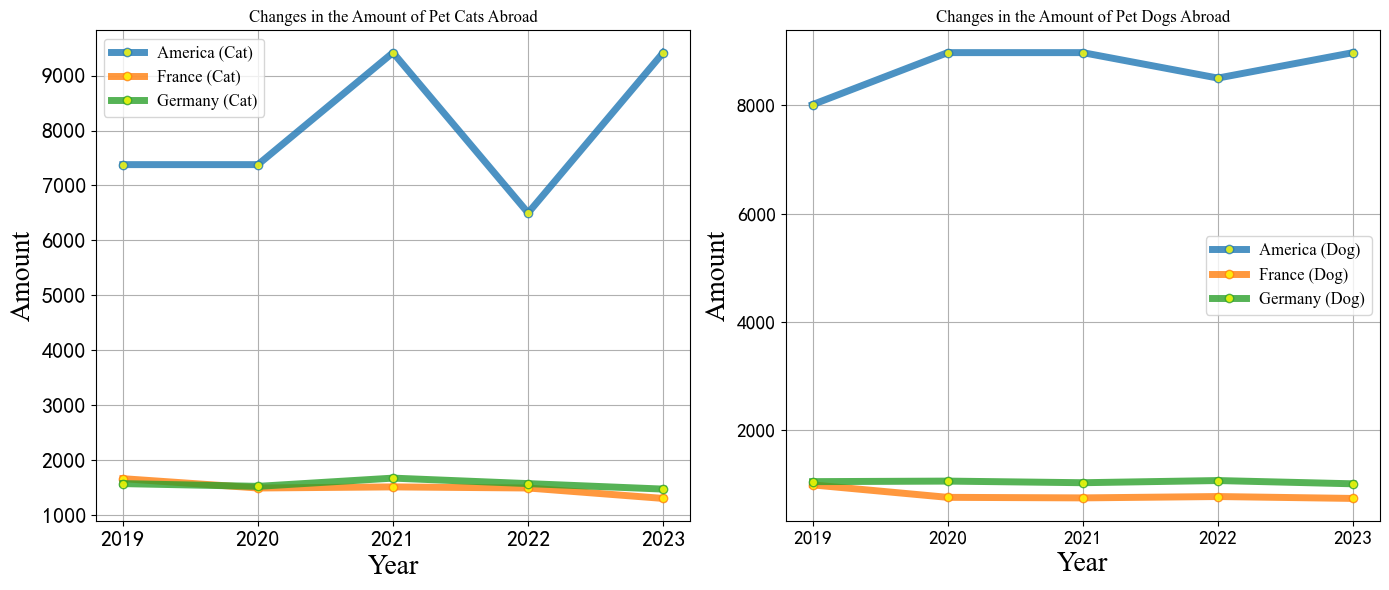

In [405]:

data = {
    "Countries": ["America", "America", "France", "France", "Germany", "Germany"],
    "Pets": ["Cat", "Dog", "Cat", "Dog", "Cat", "Dog"],
    "2023": [7380, 8010, 1660, 990, 1570, 1050],
    "2022": [7380, 8970, 1490, 760, 1520, 1060],
    "2021": [9420, 8970, 1510, 750, 1670, 1030],
    "2020": [6500, 8500, 1490, 775, 1570, 1070],
    "2019": [9420, 8970, 1300, 740, 1470, 1010],
}

df2 = pd.DataFrame(data)

cat_data = df2[df2['Pets'] == 'Cat']
dog_data = df2[df2['Pets'] == 'Dog']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


for country in cat_data['Countries'].unique():
    country_data = cat_data[cat_data['Countries'] == country]
    axes[0].plot(["2019", "2020", "2021", "2022", "2023"], 
                 country_data.iloc[0, 2:], label=f"{country} (Cat)", marker='o', linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5)
axes[0].set_title("Changes in the Amount of Pet Cats Abroad",size=20,fontproperties=latex)
axes[0].set_xlabel("Year",size=20,fontproperties=latex)
axes[0].set_ylabel("Amount",size=20,fontproperties=latex)
axes[0].legend(fontsize=15,prop=latex)
axes[0].grid(True)
axes[0].tick_params(axis='both', labelsize=16)


for country in dog_data['Countries'].unique():
    country_data = dog_data[dog_data['Countries'] == country]
    axes[1].plot(["2019", "2020", "2021", "2022", "2023"], 
                 country_data.iloc[0, 2:], label=f"{country} (Dog)", marker='o', linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5)
axes[1].set_title("Changes in the Amount of Pet Dogs Abroad",size=20,fontproperties=latex)
axes[1].set_xlabel("Year",size=20,fontproperties=latex)
axes[1].set_ylabel("Amount",size=20,fontproperties=latex)
axes[1].legend(fontsize=15,prop=latex)
axes[1].grid(True)
axes[1].tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.savefig('国外宠物数量变化情况.png',dpi=500)


plt.show()


In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

def f(years,industry_scale,name):
   # convert to pandas DataFrame
    data = pd.DataFrame({
        'year': years,
        'industry_scale': industry_scale
    })
    data.set_index('year', inplace=True)


# Fitting the Holt linear trend model
# Holt method is applied to data with a trend, select the model that adds the trend ('add')
    model = Holt(data['industry_scale']).fit(smoothing_level=0.8, smoothing_trend=0.2)

# Projections for the next 3 years are made
    forecast_steps = 3
    forecast = model.forecast(steps=forecast_steps)

# Output prediction results
    forecast_years = ['2024', '2025', '2026']
    forecast_df = pd.DataFrame({
        'year': forecast_years,
        'predicted_industry_scale': forecast
    })
# Visualization of predicted results
    plt.figure(figsize=(10, 6))
    plt.plot(data['industry_scale'], marker="o", label="History", linestyle='-',markerfacecolor='yellow',alpha=0.8,linewidth=5,color='r')
    plt.plot(forecast_df['year'], forecast_df['predicted_industry_scale'], marker="o", label="Predict", linestyle='-',color='blue',markerfacecolor='yellow',alpha=0.8,linewidth=5)
    plt.title(f"{name}",fontproperties=latex)
    plt.xlabel("Year",fontproperties=latex)
    plt.ylabel("Billion (Yuan)",fontproperties=latex)
    plt.legend(prop=latex)
    plt.grid(True)
    plt.savefig(f'问题2\\{name}.png',dpi=500)
    plt.show()
    return forecast_df['predicted_industry_scale'].values

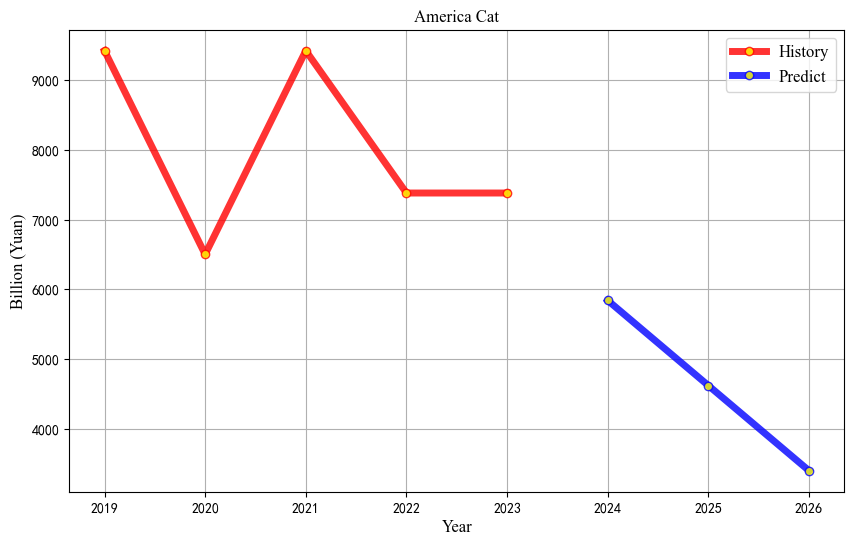

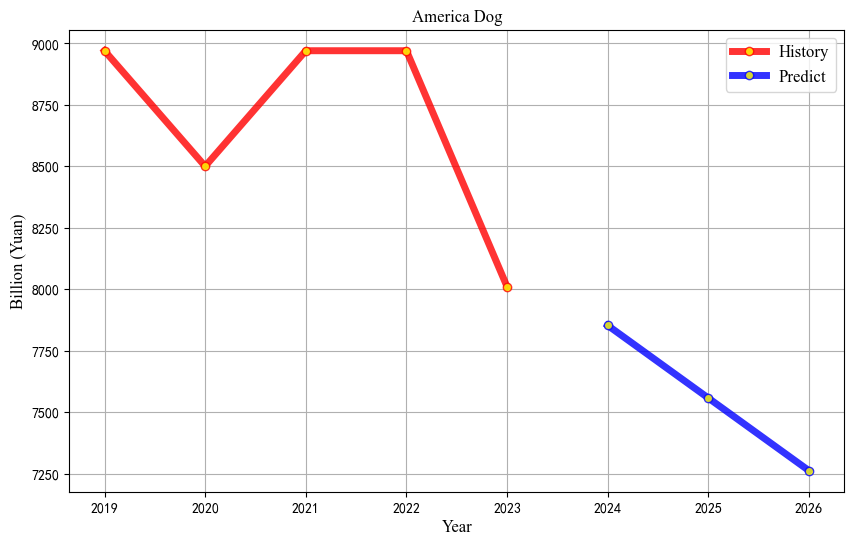

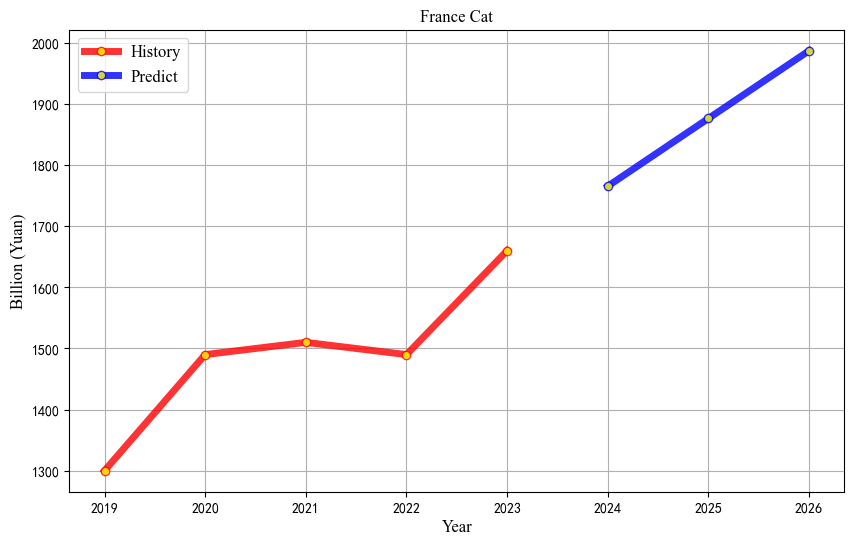

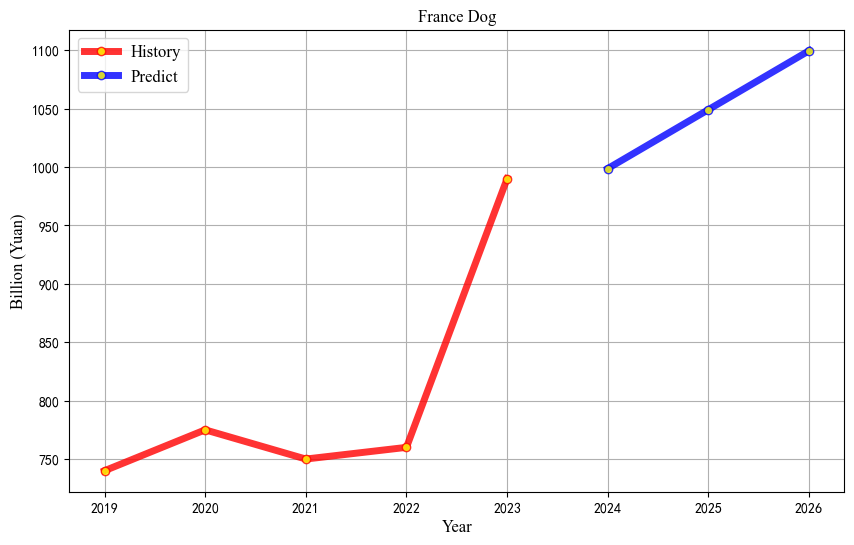

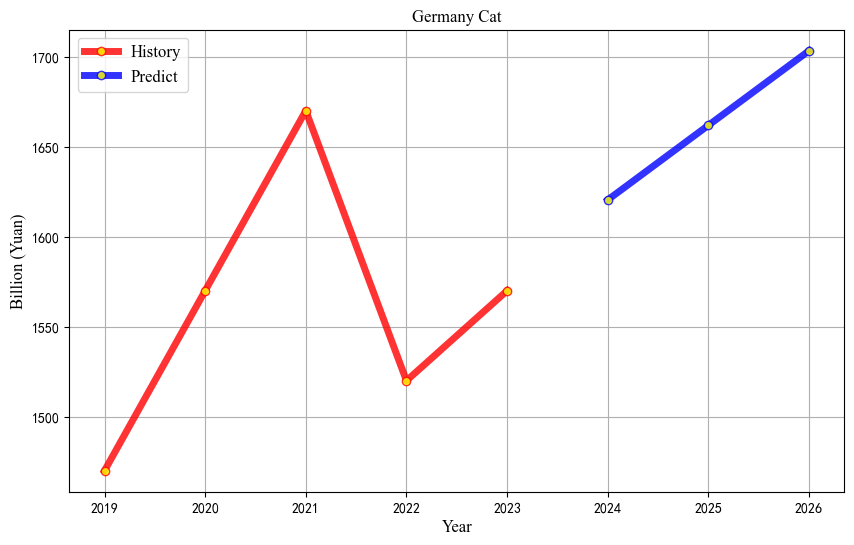

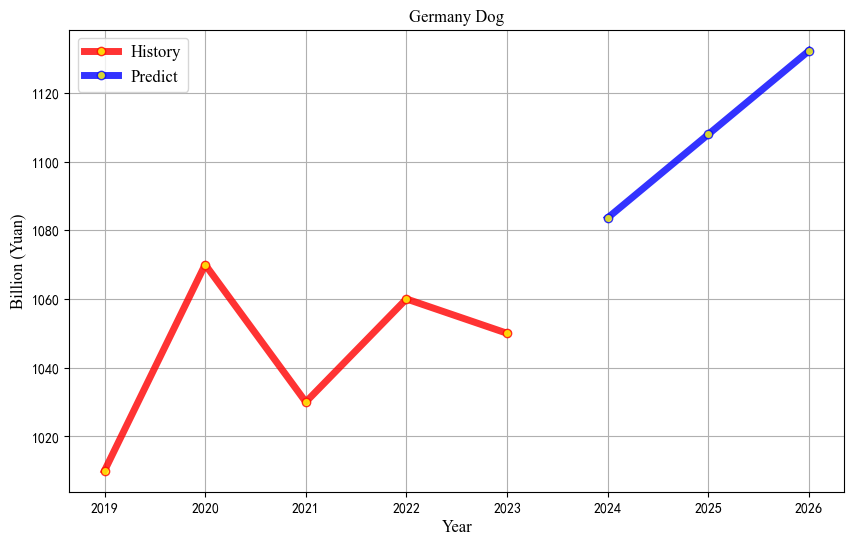

In [407]:
columns = df2['Countries'] +' '+ df2['Pets']
df3 = df2[df2.columns[2:]].T
df3.columns = columns
df3 = df3.sort_index()

ls = []
for i in df3.columns[:]:
    ls.append(f(df3.index.astype('str'),df3[i].values,i))
result = pd.DataFrame(ls,columns=['2024', '2025', '2026'],index=df3.columns[:]).T
result.to_excel('国外宠物数量变化预测结果.xlsx')